In [1]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs


d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\rasterio\__init__.py:310: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


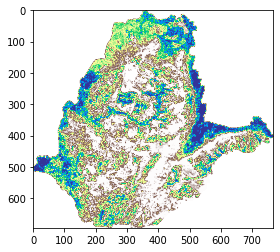

<open DatasetReader name='D:/OneDrive - CGIAR/Documents/GitHub/ethiopia_fertilize_system/src/webapi/fertilizer_et-et_wheat_compost_probabilistic_above.tif' mode='r'>
[[[253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  ...
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]
  [253 253 253 ... 253 253 253]]]


In [7]:
fp = r"D:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\fertilizer_et-et_wheat_compost_probabilistic_above.tif"
out = r"D:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\test_out2.tif"
data = rasterio.open(fp)
show((data), cmap='terrain')
print(data)

values = data.read()
print(values)


In [38]:
minx, miny = 40.974609106779106, 7.684862154473377

maxx, maxy = 47.280761450529106, 14.260124068472594

bbox = box(minx, miny, maxx, maxy)

geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
geo = geo.to_crs(crs=data.crs.data)

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(geo)    
print(coords)

[{'type': 'Polygon', 'coordinates': [[[47.280761450529106, 7.684862154473377], [47.280761450529106, 14.260124068472594], [40.974609106779106, 14.260124068472594], [40.974609106779106, 7.684862154473377], [47.280761450529106, 7.684862154473377]]]}]


d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [39]:
out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)
out_meta = data.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 60, 'height': 56, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.25, 0.0, 33.0,
       0.0, -0.25, 17.0)}


In [40]:
epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)
out_meta.update({"driver": "GTiff", 
                "height": out_img.shape[1],
                "width": out_img.shape[2],
                "transform": out_transform,
                "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

4326


d:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\venv\lib\site-packages\matplotlib\colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


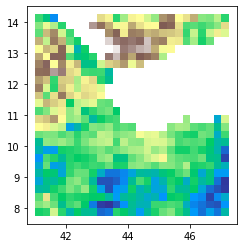

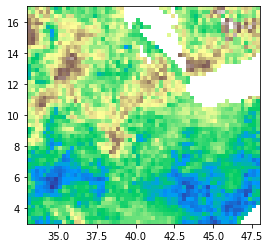

<AxesSubplot:>

In [42]:
with rasterio.open(out, "w", **out_meta) as dest:
    dest.write(out_img)

clipped = rasterio.open(out)
show((clipped), cmap='terrain')
show((data), cmap='terrain')




In [9]:
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
from owslib.wcs import WebCoverageService
from owslib.wps import WebProcessingService
import geopandas as gpd

# wfs_url = 'https://geo.aclimate.org/geoserver/fertilizer_et/wfs'
# wfs = WebFeatureService(wfs_url, version='2.0.0')

wps_url = 'https://geo.aclimate.org/geoserver/fertilizer_et/wps'
wps = WebProcessingService(wps_url, verbose=False, skip_caps=True)
wps.getcapabilities()

#process list
for process in wps.processes:

    print(process.identifier, process.title)


JTS:area Area
JTS:boundary Boundary
JTS:buffer Buffer
JTS:centroid Centroid
JTS:contains Contains Test
JTS:convexHull Convex Hull
JTS:crosses Crosses Test
JTS:densify Densify
JTS:difference Difference
JTS:dimension Dimension
JTS:disjoint Disjoint Test
JTS:distance Distance
JTS:endPoint End Point
JTS:envelope Envelope
JTS:equalsExact Exactly Equal Test
JTS:equalsExactTolerance Exactly Equal Test with Tolerance
JTS:exteriorRing Exterior Ring
JTS:geometryType Geometry Type
JTS:getGeometryN Nth Geometry
JTS:getX Get X Ordinate
JTS:getY Get Y Ordinate
JTS:interiorPoint Interior Point
JTS:interiorRingN Nth Interior Ring
JTS:intersection Intersection
JTS:intersects Intersects Test
JTS:isClosed Closed Test
JTS:isEmpty Empty Test
JTS:isRing Ring Test
JTS:isSimple Simple Test
JTS:isValid Valid Test
JTS:isWithinDistance Within Distance Test
JTS:length Length
JTS:numGeometries Geometry Count
JTS:numInteriorRing Interior Ring Count
JTS:numPoints Number of Points
JTS:overlaps Overlaps Test
JTS:point

In [2]:
#canada_admin_boundaries_index = sorted_layer_ids.index('public:canada_admin_boundaries')
#for layerID in sorted_layer_ids[canada_admin_boundaries_index - 1:canada_admin_boundaries_index + 2]:

for layerID in sorted_layer_ids:
    layer = wps[layerID]
    print('Layer ID:', layerID)
    print('Title:', layer.title)
    print('Boundaries:', layer.boundingBoxWGS84, '\n')


layer_id = sorted_layer_ids[0]
meta = wps.contents[layer_id]
print(meta.title)


Layer ID: fertilizer_et__et_wheat_compost_probabilistic_above
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_compost_probabilistic_below
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_compost_probabilistic_normal
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_nps_probabilistic_above
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_nps_probabilistic_below
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_nps_probabilistic_normal
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_optimal_nutrients_n_above
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_optimal_nutrients_n_below
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_optimal_nutrients_n_normal
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_optimal_nutrients_p_above
Title: None
Boundaries: None 

Layer ID: fertilizer_et__et_wheat_optimal_nutrients_p_below
Title: None
Boundaries: Non

In [3]:
layerid = 'fertilizer_et__et_wheat_compost_probabilistic_above'
temp = wps[layerid]
#Title
print('Layer title :', temp.title)
#bounding box
print('BoundingBox :', temp.boundingBoxWGS84)
# supported data formats - we'll use geotiff
print('Formats :', temp.supportedFormats)
#grid dimensions
print('Grid upper limits :', temp.grid.highlimits)

Layer title : None
BoundingBox : None
Formats : ['application/gml+xml', 'application/x-gzip', 'image/jpeg', 'image/png', 'image/tiff', 'image/tiff;application=geotiff', 'text/plain']
Grid upper limits : ['3905', '3534']


In [36]:
format_wps = 'image/tiff;application=geotiff'
bbox_wcs = temp.boundingboxes[0]['bbox'] # Get the entire domain
crs_wcs = temp.boundingboxes[0]['nativeSrs'] # Coordinate system
w = int(temp.grid.highlimits[0] )
h = int(temp.grid.highlimits[1])

# print("Format:", format_wcs)
# print("Bounding box:", bbox_wcs)
# print("Projection:", crs_wcs)
# print("Resolution: {} x {}".format(w, h))

output = wps.get(identifier=[layerid, ], crs='http://www.opengis.net/def/crs/EPSG/0/4326', bbox=(-80.1, -180.0, 89.9, 180.0), width=w, height=h, format=format_wcs)

HTTPError: 404 Client Error:  for url: https://geo.aclimate.org/geoserver/fertilizer_et/wcs?version=2.0.0&request=GetCoverage&service=WCS&CoverageID=fertilizer_et__et_wheat_compost_probabilistic_above&crs=http://www.opengis.net/def/crs/EPSG/0/4326&format=image/tiff;application=geotiff&width=3905&height=3534

In [29]:
fn = layerid + '.tif'
with open(fn, 'wb') as fh:
    fh.write(output.read())

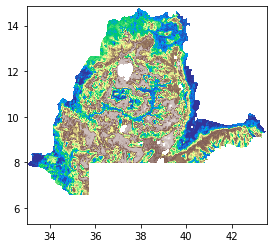

[[[-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
  [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
  [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
  ...
  [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
  [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
  [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]]]


In [34]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist

out = r'D:\OneDrive - CGIAR\Documents\GitHub\ethiopia_fertilize_system\src\webapi\api_modules\fertilizer_et__et_wheat_compost_probabilistic_above.tif'
clipped = rasterio.open(out)
show((clipped), cmap='terrain')
#show((data), cmap='terrain')

values = clipped.read()
print(values)